In [1]:
import matplotlib as mp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load the stock data

In [2]:
# Read in data and display first 5 rows
stockData = pd.read_csv('/data/WorkData/firmEmbeddings/Models/StockPredictionUsingRandomForest/stockData07to13_logdiff_5_0.1.csv')

# Display  stock data

In [3]:
columns = ['Date','CompanyName','ClosingPrice','City','State','NAICS','LogDiff']
stockData.columns = columns

stockData['Date'] =  pd.to_datetime(stockData['Date'])

stockData

,Date,CompanyName,ClosingPrice,City,State,NAICS,LogDiff
0,2012-03-14,AAR CORP,22.000,Wood Dale,IL,423860.0,0.021011
1,2011-06-13,AAR CORP,25.100,Wood Dale,IL,423860.0,-0.551843
2,2007-09-24,AAR CORP,29.670,Wood Dale,IL,423860.0,-0.381545
3,2013-05-09,AAR CORP,25.630,Wood Dale,IL,423860.0,0.209296
4,2007-10-23,AAR CORP,32.220,Wood Dale,IL,423860.0,0.494777
5,2009-11-16,AAR CORP,20.360,Wood Dale,IL,423860.0,0.120958
6,2012-12-28,AAR CORP,18.090,Wood Dale,IL,423860.0,0.318570
7,2012-02-16,AAR CORP,22.710,Wood Dale,IL,423860.0,-0.455907
8,2010-10-05,AAR CORP,23.430,Wood Dale,IL,423860.0,0.019537
9,2007-08-08,AAR CORP,32.120,Wood Dale,IL,423860.0,-0.082377


# Load the case data

In [5]:
caseData = pd.read_pickle('/data/WorkData/firmEmbeddings/Models/StockPredictionUsingRandomForest/ngramdata.pkl')

In [6]:
caseData['Date'] =  pd.to_datetime(caseData['Date'])
caseData

,Date,Month,affidavit_state,different_view,case_differs,car_wash,aggravated_murder,review_committee,correct_result,additional_defendant,...,deposit_account,policy_state,regulation_promulgate,defendant_united,uniform_rule,seeking_relief,class_counsel,news_report,could_sell,enrichment_claim
CaseId,,,,,,,,,,,,,,,,,,,,,
X1B7QSOG0000N,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1F0SD0N,2012-11-13,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1K6P0I003,2013-08-01,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1K6SOM003,2013-08-02,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1K6SOQ003,2013-08-02,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1K7A86003,2013-08-05,8,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
X1K7CCI003,2013-08-05,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1K7E4U003,2013-08-06,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1K7I66003,2013-08-06,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Join the data on Date field

In [7]:
#Join stock and train case data
joinedData = pd.merge(caseData,stockData,how='inner',on='Date')


In [8]:
joinedData

,Date,Month,affidavit_state,different_view,case_differs,car_wash,aggravated_murder,review_committee,correct_result,additional_defendant,...,class_counsel,news_report,could_sell,enrichment_claim,CompanyName,ClosingPrice,City,State,NAICS,LogDiff
0,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,AAR CORP,24.4300,Wood Dale,IL,423860.0,-0.066855
1,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,AARON'S INC,27.5000,Atlanta,GA,532299.0,0.156277
2,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,ABBOTT LABORATORIES,35.0300,Abbott Park,IL,325412.0,0.024143
3,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,ALEXANDER'S INC,286.5700,Paramus,NJ,531120.0,-0.028464
4,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,ALLEGHANY CORP,394.1800,New York,NY,524126.0,-0.026447
5,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,US ECOLOGY INC,28.9700,Boise,ID,562211.0,0.021275
6,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,AMERICAN PACIFIC CORP,41.8100,Cedar City,UT,325180.0,0.082910
7,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,AMPCO-PITTSBURGH CORP,17.6300,Carnegie,PA,332111.0,-0.038064
8,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,APOGEE ENTERPRISES INC,26.9100,Minneapolis,MN,327215.0,-0.208284
9,2013-08-15,8,0,0,0,0,0,0,0,0,...,0,0,0,0,ASTRONICS CORP,42.0800,East Aurora,NY,336413.0,0.033126


In [9]:
type(joinedData)

pandas.core.frame.DataFrame

In [10]:
joinedData.columns

Index(['Date', 'Month', 'affidavit_state', 'different_view', 'case_differs',
       'car_wash', 'aggravated_murder', 'review_committee', 'correct_result',
       'additional_defendant',
       ...
       'class_counsel', 'news_report', 'could_sell', 'enrichment_claim',
       'CompanyName', 'ClosingPrice', 'City', 'State', 'NAICS', 'LogDiff'],
      dtype='object', length=12213)

In [11]:
joinedData = joinedData.drop(columns=['City','State','NAICS','Month','Date'])


In [12]:
joinedData = joinedData.drop(columns=['ClosingPrice'])

In [13]:
joinedData

,affidavit_state,different_view,case_differs,car_wash,aggravated_murder,review_committee,correct_result,additional_defendant,regular_basis,negligent_act,...,regulation_promulgate,defendant_united,uniform_rule,seeking_relief,class_counsel,news_report,could_sell,enrichment_claim,CompanyName,LogDiff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AAR CORP,-0.066855
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AARON'S INC,0.156277
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ABBOTT LABORATORIES,0.024143
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ALEXANDER'S INC,-0.028464
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ALLEGHANY CORP,-0.026447
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,US ECOLOGY INC,0.021275
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AMERICAN PACIFIC CORP,0.082910
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AMPCO-PITTSBURGH CORP,-0.038064
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,APOGEE ENTERPRISES INC,-0.208284
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ASTRONICS CORP,0.033126


# One hot encode firm names

In [14]:
data_encoded = pd.get_dummies(joinedData)

data_encoded


,affidavit_state,different_view,case_differs,car_wash,aggravated_murder,review_committee,correct_result,additional_defendant,regular_basis,negligent_act,...,CompanyName_WMS INDUSTRIES INC,CompanyName_WOODWARD INC,CompanyName_WPCS INTERNATIONAL INC,CompanyName_XCEL ENERGY INC,CompanyName_XCERRA CORP,CompanyName_XPO LOGISTICS INC,CompanyName_YADKIN FINANCIAL CORP,CompanyName_YAMANA GOLD INC,CompanyName_ZOLTEK COS INC,CompanyName_ZWEIG FUND INC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data_encoded.columns

Index(['affidavit_state', 'different_view', 'case_differs', 'car_wash',
       'aggravated_murder', 'review_committee', 'correct_result',
       'additional_defendant', 'regular_basis', 'negligent_act',
       ...
       'CompanyName_WMS INDUSTRIES INC', 'CompanyName_WOODWARD INC',
       'CompanyName_WPCS INTERNATIONAL INC', 'CompanyName_XCEL ENERGY INC',
       'CompanyName_XCERRA CORP', 'CompanyName_XPO LOGISTICS INC',
       'CompanyName_YADKIN FINANCIAL CORP', 'CompanyName_YAMANA GOLD INC',
       'CompanyName_ZOLTEK COS INC', 'CompanyName_ZWEIG FUND INC'],
      dtype='object', length=13045)

# Divide the data in train and test

In [16]:
data_encoded_train = data_encoded[:30000]
data_encoded_test = data_encoded[70001:]


print(data_encoded_train.count)
print(data_encoded_test.count)

<bound method DataFrame.count of        affidavit_state  different_view  case_differs  car_wash  \
0                    0               0             0         0   
1                    0               0             0         0   
2                    0               0             0         0   
3                    0               0             0         0   
4                    0               0             0         0   
5                    0               0             0         0   
6                    0               0             0         0   
7                    0               0             0         0   
8                    0               0             0         0   
9                    0               0             0         0   
10                   0               0             0         0   
11                   0               0             0         0   
12                   0               0             0         0   
13                   0               0     

# Get the labels 

In [17]:

labels_train = np.array(data_encoded_train['LogDiff'])
labels_test = np.array(data_encoded_test['LogDiff'])

train_data = np.array(data_encoded_train.drop(columns=['LogDiff']))
test_data = np.array(data_encoded_test.drop(columns=['LogDiff']))


# Initialize Ransdom Forest and fit on data
## Instantiate model with 50 decision trees and 20 leaves

In [18]:

rf = RandomForestRegressor(n_estimators = 50, random_state = 20)

# Train the model on training data
rf.fit(train_data, labels_train);

# Predict on test data and report error

In [20]:

predictions = rf.predict(test_data)
errors = np.zeros(400)

#print(predictions)
# Calculate the absolute errors
for i in range(400):
    if(labels_test[i] != 0):
        errors[i] = abs(predictions[i] - labels_test[i])/abs(labels_test[i])
    else:    
        errors[i] = abs(predictions[i] - labels_test[i])

# Print out the mean absolute error (mae)
print('Percent Error:', round(np.mean(errors), 2), 'degrees.')



Percent Error: 1.48 degrees.


In [24]:
import matplotlib.pyplot as plt
import numpy as np

print(len(predictions))
print(len(labels_test))

x = 400

7888
7888


# Scatter plot actual change in stock price ans predicted change in stock price 

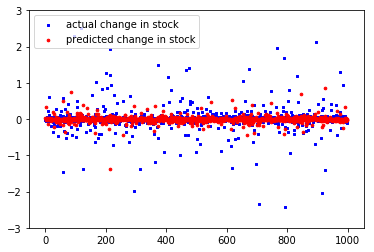

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = range(len(predictions))

x = range(1000)
ax1.scatter(x, labels_test[0:1000], s=7, c='b', marker="s", label='actual change in stock')
ax1.scatter(x,predictions[0:1000], s=7, c='r', marker="o", label='predicted change in stock')

#ax1.plot(x, actual, c='b', marker="s", label='actual change in stock')
#ax1.plot(x,predicted, c='r', marker="o", label='predicted change in stock')
plt.legend(loc='upper left');
plt.ylim(-3,3)
plt.show()
